In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop(columns =["Outcome"])
y = df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =  train_test_split(x,y,test_size=0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [7]:
estimators=[("rf",RandomForestClassifier(n_estimators = 100)),("gnb",GaussianNB()),("lr",LogisticRegression()),("knn",KNeighborsClassifier(n_neighbors = 4)),("svc",SVC(kernel = "rbf", C=1))]

voting classifier

In [8]:
from sklearn.ensemble import VotingClassifier

In [9]:
model = VotingClassifier(estimators = estimators)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
acc = accuracy_score(ytest,ypred)
acc

0.8116883116883117

<AxesSubplot:>

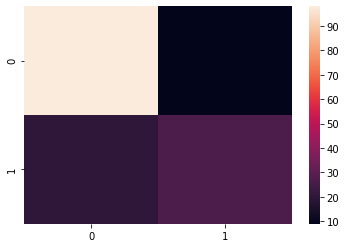

In [14]:
sns.heatmap(confusion_matrix(ytest,ypred))

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154

